<a href="https://colab.research.google.com/github/King-of-Haskul/HackJMI2-CheemsGamg/blob/master/DepthClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
!git clone https://github.com/King-of-Haskul/HackJMI2-CheemsGamg

Cloning into 'HackJMI2-CheemsGamg'...
remote: Enumerating objects: 545, done.
remote: Counting objects: 100% (545/545), done.
remote: Compressing objects: 100% (477/477), done.
remote: Total 545 (delta 65), reused 542 (delta 62), pack-reused 0
Receiving objects: 100% (545/545), 22.07 MiB | 24.51 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [4]:
import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = 'HackJMI2-CheemsGamg/data/depth_train'
val_path = 'HackJMI2-CheemsGamg/data/depth_val'
train_batches = ImageDataGenerator(rescale=1./255) \
    .flow_from_directory(directory=train_path, target_size=(320,320), classes=['real', 'fake'], batch_size=10)

val_batches = ImageDataGenerator(rescale=1./255) \
    .flow_from_directory(directory=val_path, target_size=(320,320), classes=['real', 'fake'])

Found 223 images belonging to 2 classes.
Found 19 images belonging to 2 classes.


In [8]:
imgs, labels = next(train_batches)

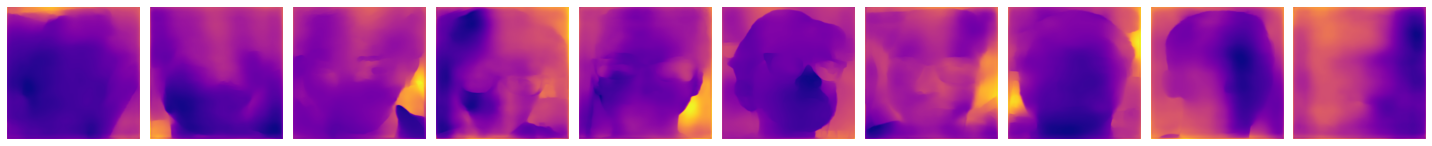

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [9]:
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(imgs)
print(labels)

In [10]:
depth_clf = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(320,320,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])


In [11]:
depth_clf.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
depth_clf.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=val_batches,
    validation_steps=len(val_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
23/23 - 2s - loss: 0.2113 - accuracy: 0.9238 - val_loss: 0.0749 - val_accuracy: 1.0000
Epoch 2/10
23/23 - 2s - loss: 0.1883 - accuracy: 0.9283 - val_loss: 0.0867 - val_accuracy: 0.9474
Epoch 3/10
23/23 - 2s - loss: 0.1760 - accuracy: 0.9327 - val_loss: 0.0728 - val_accuracy: 0.9474
Epoch 4/10
23/23 - 2s - loss: 0.1586 - accuracy: 0.9462 - val_loss: 0.0518 - val_accuracy: 1.0000
Epoch 5/10
23/23 - 2s - loss: 0.1475 - accuracy: 0.9372 - val_loss: 0.0583 - val_accuracy: 1.0000
Epoch 6/10
23/23 - 2s - loss: 0.1303 - accuracy: 0.9507 - val_loss: 0.0659 - val_accuracy: 0.9474
Epoch 7/10
23/23 - 2s - loss: 0.0958 - accuracy: 0.9731 - val_loss: 0.0305 - val_accuracy: 1.0000
Epoch 8/10
23/23 - 2s - loss: 0.0621 - accuracy: 0.9865 - val_loss: 0.0220 - val_accuracy: 1.0000
Epoch 9/10
23/23 - 2s - loss: 0.0718 - accuracy: 0.9776 - val_loss: 0.0615 - val_accuracy: 0.9474
Epoch 10/10
23/23 - 2s - loss: 0.0671 - accuracy: 0.9821 - val_loss: 0.0246 - val_accuracy: 1.0000


In [ ]:
from google.colab import drive

drive.mount('drive')

In [45]:
from keras.models import save_model

depth_clf.save('drive/MyDrive/Datasets/depth_clf_2.h5', save_format='h5')

In [ ]:
imgs, labels = next(val_batches)

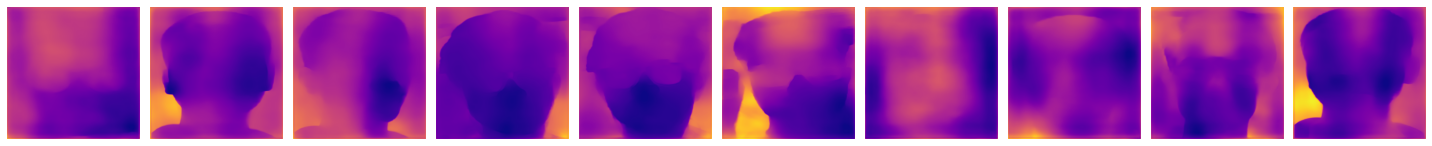

[1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1]


In [31]:
plotImages(imgs)
print(np.argmax(labels, axis=1))

In [46]:
pred = depth_clf.predict(imgs)

In [47]:
fin = np.argmax(pred, axis=1)

In [48]:
label = np.argmax(labels, axis=1)

In [49]:
label == fin

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [50]:
import sklearn
acc = sklearn.metrics.accuracy_score(label, fin)
acc

1.0